## 1. Business Understanding

###  Objective

The aim of this project is to build a **machine learning classification model** to predict whether a customer will churn. Churn is defined as a customer discontinuing their service with the company.

Churn impacts company growth, customer acquisition costs, and revenue. Reducing churn through predictive analytics can help improve long-term profitability.

---

###  Business Context

Telecommunications companies often struggle with customer churn due to fierce competition, pricing wars, and service dissatisfaction. Retaining existing customers is **significantly more cost-effective** than acquiring new ones.

By analyzing customer behavior and demographics, we aim to provide actionable insights that help the business:
- Identify at-risk customers early
- Understand the drivers of churn
- Develop targeted retention strategies

---

###  Target Variable

- **Column Name:** `Churn`
- **Type:** Binary classification
- **Values:** `Yes` (Customer churned) or `No` (Customer retained)

---

###  Key Business Questions

1. What customer behaviors, demographics, or service usage patterns are linked to churn?
2. Can we build a predictive model to flag customers likely to churn?
3. Which features contribute most to customer retention or loss?
4. How can the business leverage these insights to **proactively reduce churn**?

---

###  Success Criteria

- **Technical**: A predictive model with strong recall, F1-score, and low false negatives (so we don’t miss churners).
- **Business**: Insights are actionable and help reduce churn by **at least 10%** over the next 6 months through targeted interventions.


##  2. Data Understanding

In this step, we aim to familiarize ourselves with the dataset by understanding its structure, data types, volume, completeness, and general properties. This is a crucial foundation before cleaning, exploring, and modeling the data.

###  Objectives:
- Understand the shape and structure of the data
- Identify the target and feature variables
- Assess data types (categorical, numerical, etc.)
- Check for missing, duplicate, or inconsistent values
- Begin identifying potential relationships and patterns

###  Dataset Overview:
The dataset used in this project contains customer-level information for a telecommunications company. Each row represents a unique customer and includes attributes such as:

- **Demographics** (e.g., gender, senior citizen, partner, dependents)  
- **Account Information** (e.g., contract type, tenure, monthly charges)  
- **Service Usage** (e.g., internet service, streaming services, tech support)  
- **Churn Label** – whether the customer has churned (`Yes`/`No`)  

###  Importance of this Step:
A clear understanding of the raw data helps prevent poor assumptions and guides how we clean, explore, and model the data. Without proper understanding:
- We may misinterpret features  
- Miss important insights  
- Or introduce bias into the model  

---

In the next section, we will load the dataset and begin our initial inspection.


### 2.1 Load and Preview the Dataset

In this step, we will:
- Load the dataset from the `data/` directory
- Preview the first few rows
- Check the basic shape and column names
- Begin identifying potential issues (e.g., null values, formatting)

This gives us our first glance at what we’re working with.


In [54]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '../data/bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
# Basic structure of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
print("Column names:\n", df.columns.tolist())


Dataset contains 3333 rows and 21 columns.

Column names:
 ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


### 2.2 Data Types and Null Value Check

Before diving deeper into exploration, it's important to understand:
- The data types of each column (e.g., numeric, object)
- Whether there are missing (null) values that could affect analysis or modeling

This helps us determine:
- Which columns need to be converted to appropriate types
- Where data cleaning will be necessary


In [56]:
# Check data types and count of null values per column
df.info()

# Quick summary of nulls
null_summary = df.isnull().sum()
null_summary[null_summary > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Series([], dtype: int64)

In [57]:
# Show percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


Series([], dtype: float64)

### 2.3 Check for Duplicates and Unique Values

Identifying duplicate rows and understanding the uniqueness of columns helps ensure data quality.

In this step, we will:
- Check if the dataset contains duplicate records
- Explore how many unique values exist per column
- Detect columns with potentially constant values that may not add value to the model


In [58]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Show number of unique values per column
df.nunique().sort_values()


Number of duplicate rows: 0


churn                        2
international plan           2
voice mail plan              2
area code                    3
customer service calls      10
total intl calls            21
number vmail messages       46
state                       51
total day calls            119
total night calls          120
total eve calls            123
total intl minutes         162
total intl charge          162
account length             212
total night charge         933
total eve charge          1440
total night minutes       1591
total eve minutes         1611
total day charge          1667
total day minutes         1667
phone number              3333
dtype: int64

In [59]:
# Remove duplicates (if found)
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped.")


### 2.4 Column-by-Column Review

In this step, we briefly explore each feature to understand:

- Its purpose (e.g., customer demographic, service usage, subscription)
- Type (categorical vs numerical)
- Potential impact on churn
- If it needs cleaning or transformation

This helps guide our decisions in later steps like data preparation, feature engineering, and modeling.


In [60]:
# Display summary statistics for numeric columns
df.describe()

# Display summary for object (categorical) columns
df.describe(include='object')


,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,417-9455,no,no
freq,106,1,3010,2411


In [61]:
# Look at unique values for each column (first few)
for col in df.columns:
    print(f"\n{col}:\n{df[col].unique()[:5]}")  # Show first 5 unique values



state:
['KS' 'OH' 'NJ' 'OK' 'AL']

account length:
[128 107 137  84  75]

area code:
[415 408 510]

phone number:
['382-4657' '371-7191' '358-1921' '375-9999' '330-6626']

international plan:
['no' 'yes']

voice mail plan:
['yes' 'no']

number vmail messages:
[25 26  0 24 37]

total day minutes:
[265.1 161.6 243.4 299.4 166.7]

total day calls:
[110 123 114  71 113]

total day charge:
[45.07 27.47 41.38 50.9  28.34]

total eve minutes:
[197.4 195.5 121.2  61.9 148.3]

total eve calls:
[ 99 103 110  88 122]

total eve charge:
[16.78 16.62 10.3   5.26 12.61]

total night minutes:
[244.7 254.4 162.6 196.9 186.9]

total night calls:
[ 91 103 104  89 121]

total night charge:
[11.01 11.45  7.32  8.86  8.41]

total intl minutes:
[10.  13.7 12.2  6.6 10.1]

total intl calls:
[3 5 7 6 4]

total intl charge:
[2.7  3.7  3.29 1.78 2.73]

customer service calls:
[1 0 2 3 4]

churn:
[False  True]


## 3. Data Preparation

The purpose of this step is to clean and transform the dataset into a format suitable for analysis and machine learning. This involves:

- Handling missing values
- Encoding categorical variables
- Scaling numerical features
- Creating any necessary derived features


### 3.1 Handle Missing Values

Missing data can lead to biased results or model errors if not addressed. We'll:

- Review which features have missing values
- Decide whether to drop or fill missing entries
- Apply imputation strategies (e.g., mean for numeric, mode for categorical)


In [62]:
# Show features with missing values
missing_cols = df.columns[df.isnull().any()]
df[missing_cols].isnull().sum()


Series([], dtype: float64)

In [63]:
# Fill numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


### 3.2 Encode Categorical Variables

Machine learning models work best with numeric data, so we need to convert categorical features into numerical format.

Common encoding strategies:
- Label Encoding for binary features
- One-Hot Encoding for features with multiple categories (nominal)
- Avoiding dummy variable trap by dropping one column per encoded feature (if needed)


In [64]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['state', 'phone number', 'international plan', 'voice mail plan']


In [65]:
# One-hot encode categorical features (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Preview shape and columns
print("New shape after encoding:", df_encoded.shape)
df_encoded.head()


New shape after encoding: (3333, 3401)


account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  state_AL  state_AR  \
0               2.70                       1  False         0         0   
1               3.70                       1  False         0         0   
2               3.29                       0  False         0         0   
3               1.78                       2  False         0         0   
4               2.73                       3  False         0         0   

   state_AZ  state_CA  state_CO  state_CT  state_DC  state_DE  state_FL  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_GA  state_HI  state_IA  state_ID  state_IL  state_IN  state_KS  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_KY  state_LA  state_MA  state_MD  state_ME  state_MI  state_MN  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_MO  state_MS  state_MT  state_NC  state_ND  state_NE  state_NH  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_NJ  state_NM  state_NV  state_NY  state_OH  state_OK  state_OR  \
0         0  

### 3.3 Feature Scaling

Feature scaling ensures all numeric features contribute equally to distance-based models and improves model convergence speed.

We'll use **StandardScaler**, which standardizes features by removing the mean and scaling to unit variance.


In [66]:
from sklearn.preprocessing import StandardScaler

# Make a copy of your dataset
df_encoded = df.copy()

# Select numerical columns (excluding object/categorical ones)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Optional: check summary statistics
print(df_encoded[numerical_cols].describe().T)



                         count          mean      std       min       25%  \
account length          3333.0  1.470971e-16  1.00015 -2.513172 -0.679745   
area code               3333.0  4.221046e-16  1.00015 -0.688834 -0.688834   
number vmail messages   3333.0  7.035077e-17  1.00015 -0.591760 -0.591760   
total day minutes       3333.0  7.312216e-16  1.00015 -3.301096 -0.662424   
total day calls         3333.0 -1.934646e-16  1.00015 -5.005247 -0.669570   
total day charge        3333.0 -2.835349e-16  1.00015 -3.301162 -0.662376   
total eve minutes       3333.0 -6.821892e-17  1.00015 -3.963622 -0.678030   
total eve calls         3333.0  3.288365e-16  1.00015 -5.025911 -0.658361   
total eve charge        3333.0  1.385697e-16  1.00015 -3.963679 -0.678312   
total night minutes     3333.0  7.887813e-17  1.00015 -3.513648 -0.669855   
total night calls       3333.0 -4.903235e-17  1.00015 -3.429870 -0.669934   
total night charge      3333.0 -4.370275e-17  1.00015 -3.515366 -0.667679   

### 3.4 Feature Engineering

We'll create a new feature:

HighServiceCaller: Indicates customers who made many service calls (above the median).


In [67]:
# Feature 1: HighServiceCaller (Binary flag if customer made more than median # of service calls)
threshold = df_encoded['customer service calls'].median()
df_encoded['HighServiceCaller'] = (df_encoded['customer service calls'] > threshold).astype(int)


In [68]:
# Feature 2: Total Calls Made
df_encoded['total_calls'] = (
    df_encoded['total day calls'] +
    df_encoded['total eve calls'] +
    df_encoded['total night calls'] +
    df_encoded['total intl calls']
)

In [69]:
# Feature 3: Total Minutes Used
df_encoded['total_minutes'] = (
    df_encoded['total day minutes'] +
    df_encoded['total eve minutes'] +
    df_encoded['total night minutes'] +
    df_encoded['total intl minutes']
)

In [70]:
# Feature 4: Total Charges
df_encoded['total_charge'] = (
    df_encoded['total day charge'] +
    df_encoded['total eve charge'] +
    df_encoded['total night charge'] +
    df_encoded['total intl charge']
)

##  Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps uncover patterns, spot anomalies, test hypotheses, and check assumptions using summary statistics and visualizations. In this step, we will:

- Understand the distribution of the target variable (`churn`)
- Analyze numerical features and their correlations
- Explore relationships between features and churn
- Examine categorical variables and their impact on churn

We begin with a look at the distribution of the target variable.


In [78]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy.stats import chi2_contingency, ttest_ind, pearsonr

# Plotting configurations
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Display settings
pd.set_option("display.max_columns", None)


### 4.1  Target Variable Distribution

Understanding the distribution of the target variable (`churn`) is crucial before modeling.

```python
# Plot churn distribution
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Check value counts
print(df['churn'].value_counts(normalize=True))
```

 **Insights:**
- The dataset is imbalanced, with a majority of customers not churning.
- This class imbalance should be addressed during the modeling phase using techniques like resampling or class-weighted algorithms.


### 4.2  Numerical Feature Distributions

Understanding the distribution of numerical features helps identify skewness, outliers, and trends that may influence churn.

```python
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target column if present
numerical_cols = [col for col in numerical_cols if col != 'churn']

# Plot distribution for each numerical feature
df[numerical_cols].hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
```

 **Insights:**
- Some features (e.g. `total day minutes`, `total intl charge`) appear normally distributed.
- Others like `number vmail messages` and `customer service calls` may show skewness or zero-inflation.
- Feature transformation or normalization may be beneficial for modeling.


### 4.3 Categorical Feature Distributions

To better understand our dataset, we visualize how each categorical feature is distributed and how it relates to the churn variable.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical features (excluding target)
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('churn')

# Plot churn count for each category in every categorical feature
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'{col.title()} vs Churn')
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


### 4.4 Correlation Matrix

A correlation matrix helps identify the strength and direction of linear relationships between numeric features. This can highlight multicollinearity or features with strong predictive potential.

We'll use a heatmap to visualize correlations.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()


### 4.5 Bivariate Analysis

Bivariate analysis helps uncover relationships between two variables — especially how different features relate to churn.

#### 1. Churn vs. Categorical Features
We’ll use count plots to compare churn rates across categories like:
- `International Plan`
- `Voice Mail Plan`



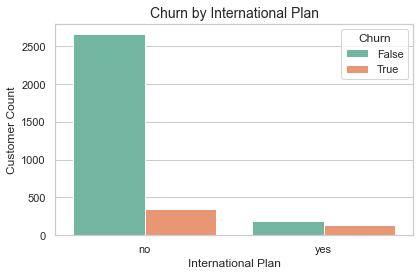

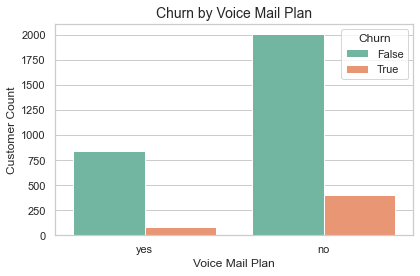

In [72]:
# 4.5 Bivariate Analysis – Categorical Features vs Churn

import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['international plan', 'voice mail plan']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_encoded, x=feature, hue='churn', palette='Set2')
    plt.title(f'Churn by {feature.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Customer Count')
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()



###  4.5 Bivariate Analysis: Categorical Features vs. Churn

Bivariate analysis helps uncover relationships between two variables — in this case, how **categorical features** influence **customer churn**.

#### 1. Churn by *International Plan*
- Customers **with** an international plan appear to **churn at a higher rate** than those without it.
- This could suggest that international plan users may be **less satisfied**, potentially due to **higher charges** or **limited value**.
- The business might investigate **pricing, usage patterns**, or **service quality** for international plan subscribers.

#### 2. Churn by *Voice Mail Plan*
- Customers **without** a voicemail plan show a **slightly higher churn rate** compared to those who have it.
- While the difference is less pronounced than with the international plan, it suggests that users who opt into additional services like voicemail may be **more engaged** or **satisfied**.

---

###  Insights:
- **International Plan** has a stronger association with churn and should be investigated further.
- **Voice Mail Plan** may be a **retention indicator** — customers who personalize or add services may be less likely to churn.


#### 2. Churn vs. Numerical Features
We’ll plot distributions using boxplots for numeric features:

Customer Service Calls

Total Day Minutes

Total Intl Charge

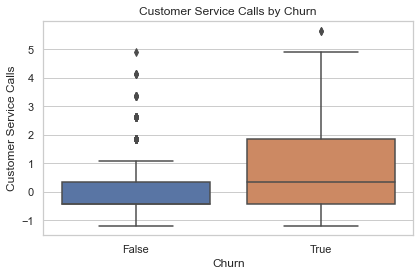

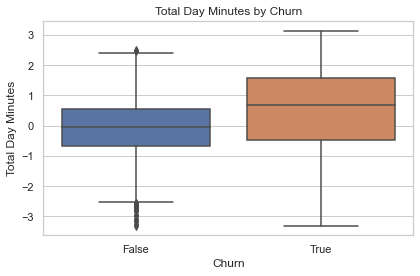

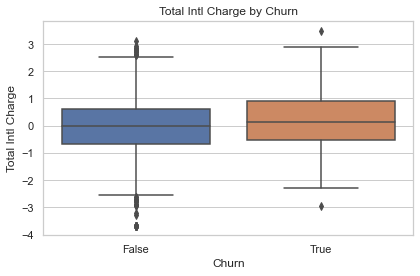

In [73]:
num_features = ['customer service calls', 'total day minutes', 'total intl charge']

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_encoded, x='churn', y=feature)
    plt.title(f'{feature.title()} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature.title())
    plt.tight_layout()
    plt.show()


## 4.5 Bivariate Analysis – Numerical Features vs. Churn

Bivariate analysis allows us to understand how numerical features vary between churned and non-churned customers using boxplots.

### Features Analyzed
We examined the following numerical features:
- `Customer Service Calls`
- `Total Day Minutes`
- `Total Intl Charge`

### Key Insights

#### 1. **Customer Service Calls**
- **Churned customers** tend to have made **more service calls** on average compared to non-churned customers.
- The distribution shows **higher outliers** for churned users, suggesting that **frequent interaction with customer service** could be a churn signal — possibly due to unresolved issues or dissatisfaction.

#### 2. **Total Day Minutes**
- Churned customers generally have **higher total day minute usage** than those who stayed.
- This could imply that **heavier users may be more demanding**, and if their expectations aren’t met (e.g. with pricing, quality), they might leave.

#### 3. **Total Intl Charge**
- Churned users appear to incur **slightly higher international charges**.
- While the difference is subtle, it may indicate that **international callers are more price-sensitive**, and small variations in charges could influence their churn behavior.


## Step 4.6: Multivariate Analysis
Multivariate analysis allows us to examine interactions between multiple variables at once to understand more complex relationships, especially how they collectively relate to churn.

#### 1. Pairplot of Key Numerical Features
This visual explores pairwise relationships between selected numerical variables, highlighting any clustering patterns between churned and retained customers.

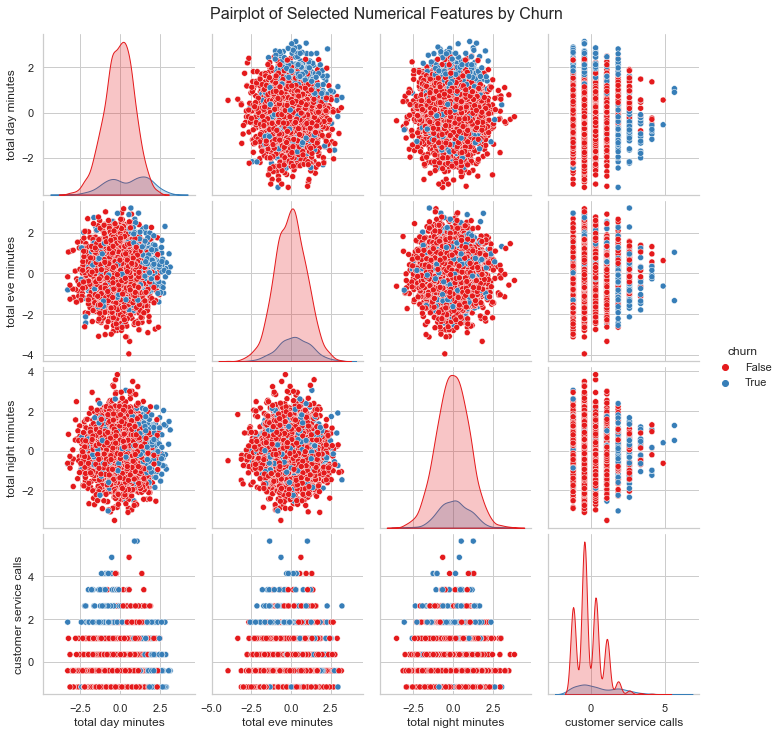

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected numerical features for pairwise relationships
selected_features = [
    'total day minutes',
    'total eve minutes',
    'total night minutes',
    'customer service calls',
    'churn'
]

# Create a pairplot
sns.pairplot(df_encoded[selected_features], hue='churn', palette='Set1')
plt.suptitle('Pairplot of Selected Numerical Features by Churn', y=1.02, fontsize=16)
plt.show()


#### Interpretation Tip: Look for noticeable groupings or separations by churn. Overlapping clusters suggest weak distinction, while clear separations indicate strong relationships.

#### 2. Correlation Heatmap
This chart helps us understand the strength and direction of relationships between numerical variables. It’s key for identifying:

Variables most correlated with churn

Multicollinearity among features

Feature engineering or selection opportunities

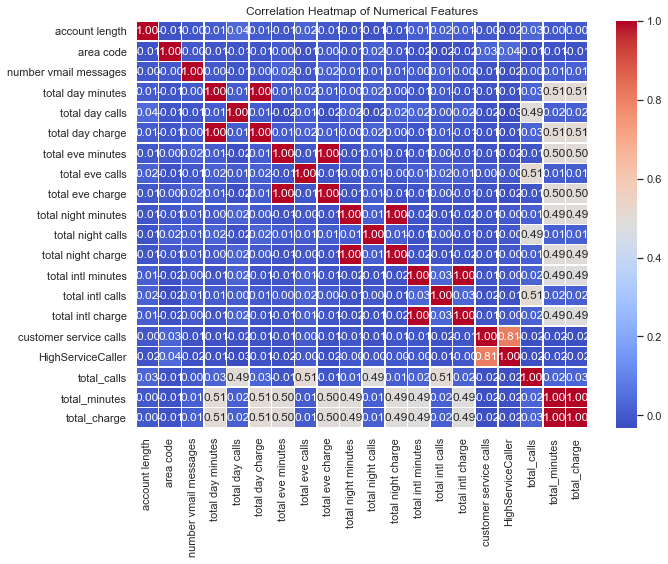

In [75]:
# 2. Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()



#### Interpretation
Look for variables that show strong positive or negative correlation with churn. These may serve as key predictive features.

If two or more input features are highly correlated with each other, it may indicate multicollinearity — which can affect some models like linear regression.

For instance, if total day minutes and total day charge are highly correlated, you may consider dropping one or combining them.

## Step 5: Statistics
The goal of this step is to apply statistical techniques to validate observed relationships in the data, test hypotheses, and quantify uncertainty in our insights. This step strengthens the credibility of our conclusions and informs our machine learning approach in the next phase.

#### 5.1 Descriptive Statistics
We begin with descriptive statistics to summarize the central tendency, dispersion, and shape of the distributions of numerical features.

In [79]:
# Summary statistics of numerical features
df_encoded.describe().T


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,1.470971e-16,1.000150,-2.513172,-0.679745,-0.001628,0.651374,3.564766
area code,3333.0,4.221046e-16,1.000150,-0.688834,-0.688834,-0.523603,1.718817,1.718817
number vmail messages,3333.0,7.035077e-17,1.000150,-0.591760,-0.591760,-0.591760,0.869554,3.134591
total day minutes,3333.0,7.312216e-16,1.000150,-3.301096,-0.662424,-0.006888,0.672520,3.140422
total day calls,3333.0,-1.934646e-16,1.000150,-5.005247,-0.669570,0.028125,0.675985,3.217588
total day charge,3333.0,-2.835349e-16,1.000150,-3.301162,-0.662376,-0.006730,0.672679,3.140803
total eve minutes,3333.0,-6.821892e-17,1.000150,-3.963622,-0.678030,0.008276,0.676833,3.209066
total eve calls,3333.0,3.288365e-16,1.000150,-5.025911,-0.658361,-0.005739,0.697085,3.508382
total eve charge,3333.0,1.385697e-16,1.000150,-3.963679,-0.678312,0.008459,0.676669,3.207980
total night minutes,3333.0,7.887813e-17,1.000150,-3.513648,-0.669855,0.006486,0.680849,3.839081


#### Interpretation:
Look for large differences between mean and median (indicating skewness).

Examine the standard deviation to understand variability.

Identify potential outliers using min/max relative to the mean and standard deviation.



## Step 5.2: Churn Group Comparison – T-Test

To evaluate whether the means of key numerical features differ significantly between customers who churned and those who did not, we perform an **independent two-sample t-test**. This helps determine if a particular feature is a strong candidate for predicting churn.

### Objective:
Compare the mean values of selected numerical features between the two groups:
- Churned customers (`churn = 1`)
- Non-churned customers (`churn = 0`)

In [80]:
from scipy.stats import ttest_ind

# Split the dataset
churned = df_encoded[df_encoded['churn'] == 1]
not_churned = df_encoded[df_encoded['churn'] == 0]

# Example T-test for 'total day minutes'
stat, p = ttest_ind(
    churned['total day minutes'],
    not_churned['total day minutes'],
    equal_var=False
)

print(f"T-Statistic: {stat:.4f}")
print(f"P-Value: {p:.4f}")

T-Statistic: 9.6846
P-Value: 0.0000


#### Interpretation:
T-Statistic: Measures the size of the difference relative to the variation in the sample data.

P-Value < 0.05: Indicates a statistically significant difference in means.

If a feature shows significant difference, it may be a strong predictor for churn.

## Step 5.3: Correlation with Churn

In this step, we quantify how strongly each **numeric feature** is related to the **churn** variable. This gives us a quick snapshot of which features are most predictive of churn.

### Objective:
- Measure the **linear correlation** between numerical variables and churn.
- Identify features with **strong positive or negative** relationships with churn.
- Guide feature selection for modeling.


In [81]:
# Compute correlation of features with churn
correlations = df_encoded.corr()['churn'].sort_values(ascending=False)

# Display correlation values
print(correlations)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total_charge              0.202761
total_minutes             0.202755
HighServiceCaller         0.099932
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total_calls              -0.009465
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


#### Interpretation:
Correlation values range from -1 to 1:

Closer to 1: Strong positive correlation (churn increases with the feature).

Closer to -1: Strong negative correlation (churn decreases with the feature).

Near 0: Weak or no linear relationship.

Features with high absolute correlation to churn may be strong candidates for predictive modeling.

##  Step 6: Machine Learning

The goal of this step is to build and evaluate models that predict customer churn based on the available features. We'll follow a structured approach involving data preparation, model training, and evaluation.

---

###  6.1 Train-Test Split

We begin by splitting our dataset into training and testing sets. This ensures that we evaluate our models on unseen data to measure real-world performance.


In [82]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns='churn')
y = df_encoded['churn']

# 80-20 split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)